# Notebook for data exploration

## Wifi data loading and exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/trip_1/wifi_data.csv', sep=';')
data

,id,arr_ts,epoch_ts,vendor,frame_nr,subtype,mac_address,rssi,seq_num,ht_capabilities,ht_ampdu,tag_nr,tag_length,tag_mcs,tag_HTex,tag_TXbf,tag_Antsel
0,1,"Apr 12, 2021 11:22:24.116167186 CEST",1.618219e+09,nil,1,4,d6:26:b4:b7:b0:93,-57,2030,0x0000016f,0x00000013,0,0,(none),0x00000000,0x00000000,0x00000000
1,2,"Apr 12, 2021 11:22:24.177903513 CEST",1.618219e+09,nil,2,4,d6:26:b4:b7:b0:93,-59,2031,0x0000016f,0x00000013,0,0,(none),0x00000000,0x00000000,0x00000000
2,3,"Apr 12, 2021 11:22:28.776136091 CEST",1.618219e+09,nil,3,4,92:6a:96:38:22:e7,-43,2083,0x0000402d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
3,4,"Apr 12, 2021 11:22:28.792671135 CEST",1.618219e+09,nil,4,4,92:6a:96:38:22:e7,-43,2084,0x0000402d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
4,5,"Apr 12, 2021 11:22:30.466902764 CEST",1.618219e+09,nil,8,4,ec:10:7b:6b:21:fc,-35,1447,0x0000016e,0x00000003,0,0,(none),0x00000000,0x00000000,0x00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,9586,"Apr 12, 2021 12:17:38.449978856 CEST",1.618223e+09,nil,11016,4,a2:55:58:08:03:fa,-43,3253,0x0000402d,0x0000001b,0,0,(none),0x00000000,0x00000000,0x00000000
9586,9587,"Apr 12, 2021 12:17:38.685731267 CEST",1.618223e+09,nil,11017,4,8e:f0:97:5f:20:a8,-69,545,0x000011ef,0x0000001b,0,0,(none),0x00000000,0x00000000,0x00000000
9587,9588,"Apr 12, 2021 12:17:38.886854416 CEST",1.618223e+09,nil,11018,4,0a:17:49:42:9a:c3,-49,2910,0x0000012d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000
9588,9589,"Apr 12, 2021 12:17:38.929599434 CEST",1.618223e+09,nil,11019,4,0a:17:49:42:9a:c3,-51,2911,0x0000012d,0x00000017,0,0,(none),0x00000000,0x00000000,0x00000000


### How meny different MAC addrs are there?

In [37]:
len(set(data["mac_address"]))

3627

### Check RSSI strength histogram over one bus stop

<AxesSubplot:>

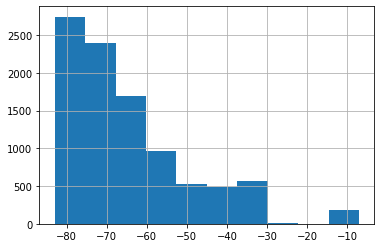

In [28]:
data["rssi"].hist()

## Check target results

In [4]:
gt = pd.read_csv("data/trip_1/passenger_count_nums")
gt = gt.drop(gt.index[0])
gt

,Epoch_Time,Number_of_Passengers
1,1618219347.84,-10.0
2,1618219353.9,12.0
3,1618219367.0,-99.0
4,1618219383.0,-10.0
5,1618219394.57,14.0
...,...,...
92,1618222386.94,13.0
93,1618222546.0,-99.0
94,1618222559.0,-10.0
95,1618222585.93,13.0


### Per stop rssi histogram

In [79]:
start = 1618219347.84
stop = 1618219367.0
print(len(gt["Epoch_Time"] == -10))
print(len(gt["Epoch_Time"] == -99))

96
96


In [5]:
starts = gt[gt["Number_of_Passengers"] == -10]["Epoch_Time"]
stops = gt[gt["Number_of_Passengers"] == -99]["Epoch_Time"]
gt_numbers = gt[(gt["Number_of_Passengers"] != -10) & (gt["Number_of_Passengers"] != -99)]["Number_of_Passengers"]

In [16]:
gt_numbers

2     12.0
5     14.0
8     18.0
11    17.0
14    10.0
17    11.0
20     7.0
23     8.0
26    10.0
29    15.0
32    13.0
35    12.0
38    12.0
41    16.0
44    18.0
47    10.0
50    13.0
53    12.0
56    12.0
59    14.0
62    18.0
65    16.0
68    13.0
71     9.0
74    17.0
77    14.0
80    15.0
83    16.0
86    14.0
89    15.0
92    13.0
95    13.0
Name: Number_of_Passengers, dtype: float64

16 12.0
124 14.0
136 18.0
130 17.0
170 10.0
145 11.0
105 7.0
259 8.0
155 10.0
472 15.0
171 13.0
241 12.0
216 12.0
244 16.0
217 18.0
574 10.0
196 13.0
250 12.0
172 12.0
277 14.0
234 18.0
304 16.0
873 13.0
296 9.0
326 17.0
407 14.0
320 15.0
79 16.0
51 14.0
106 15.0
341 13.0
349 13.0


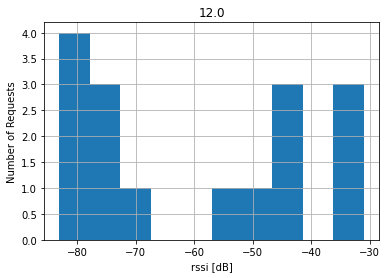

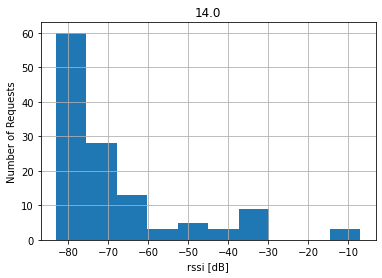

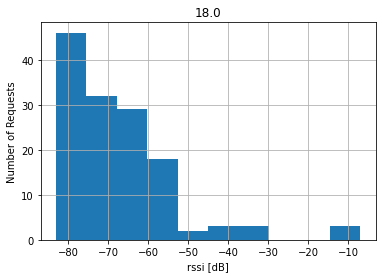

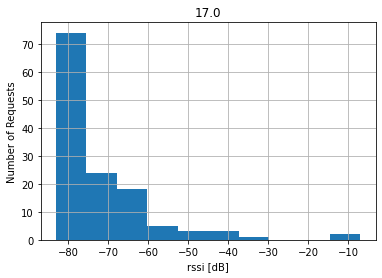

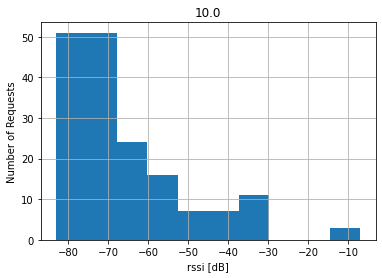

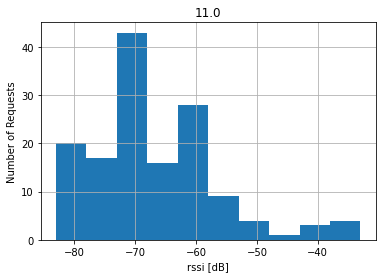

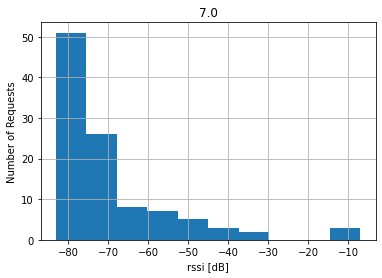

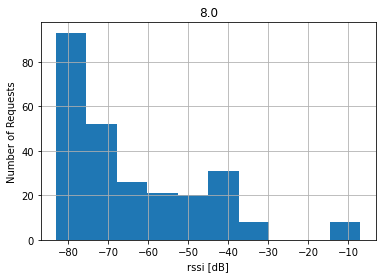

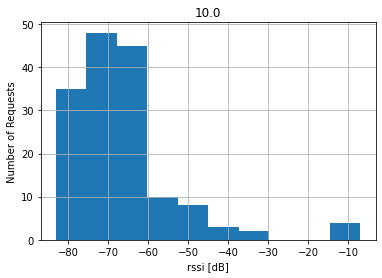

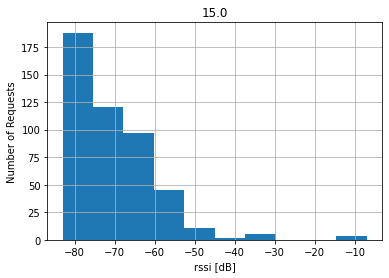

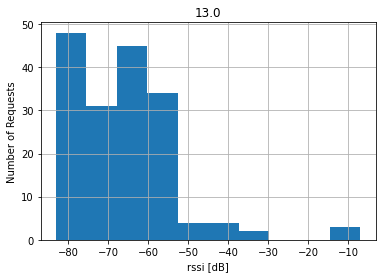

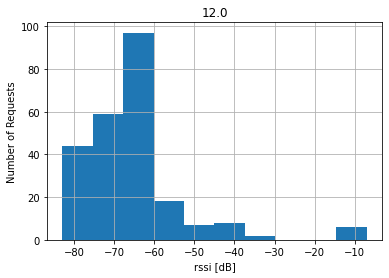

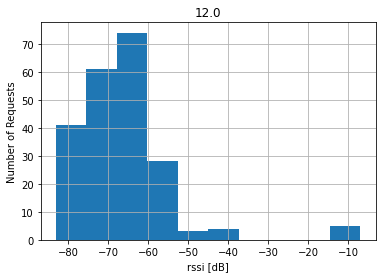

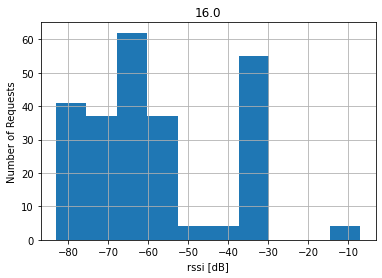

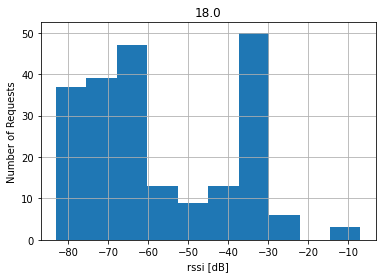

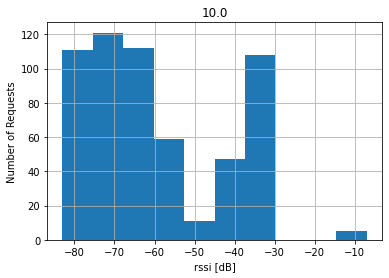

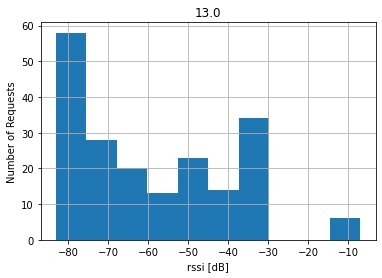

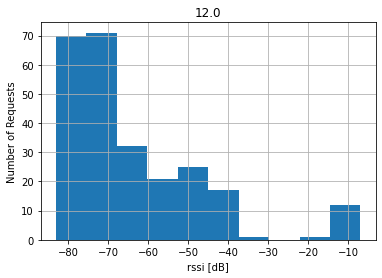

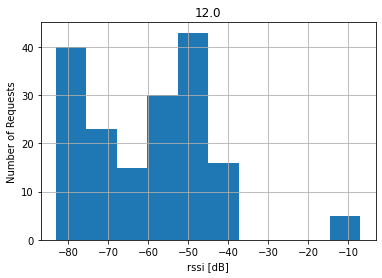

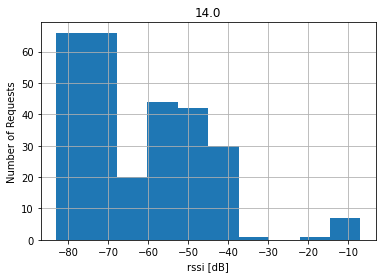

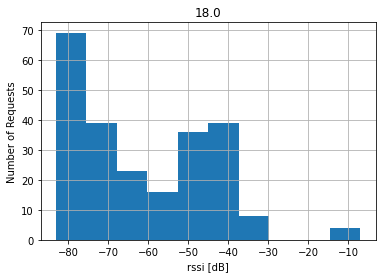

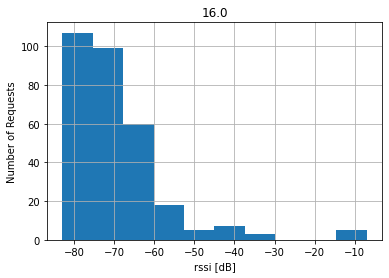

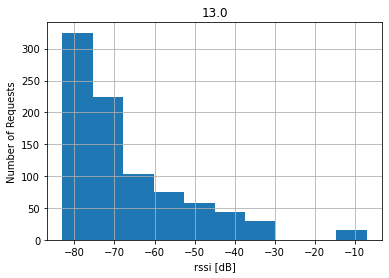

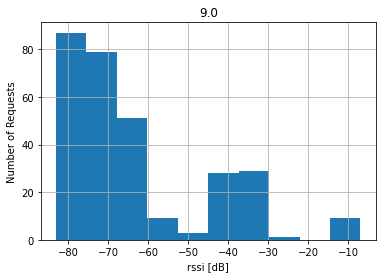

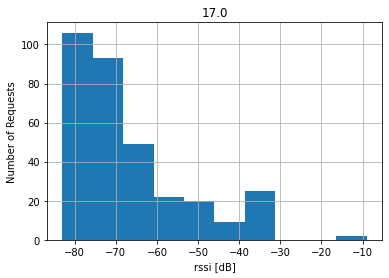

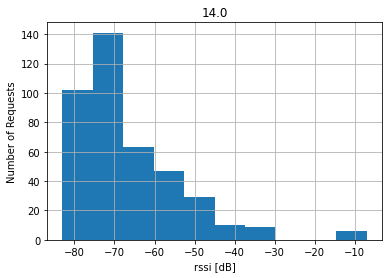

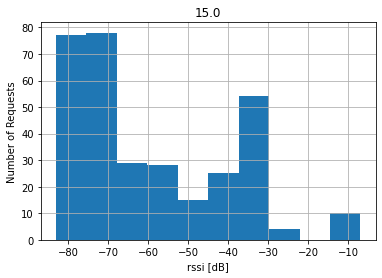

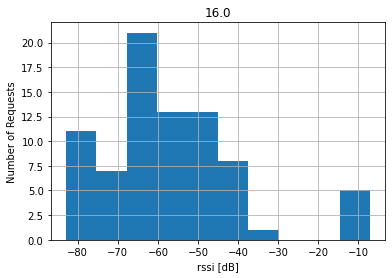

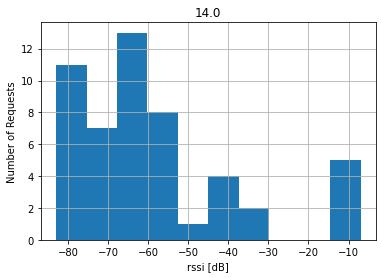

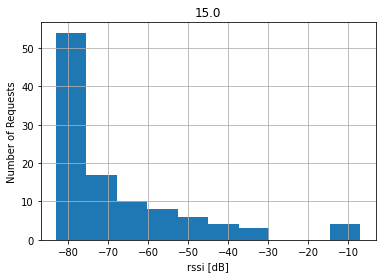

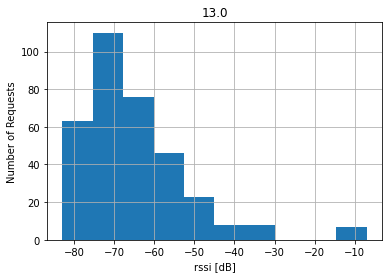

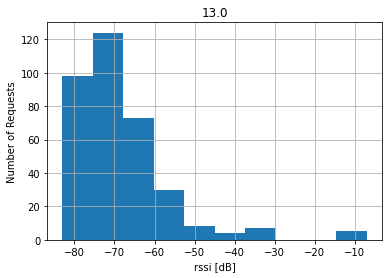

In [11]:
for start, stop, number in zip(starts, stops, gt_numbers):
    conn = data[(data["epoch_ts"] > float(start)) & (data["epoch_ts"] < float(stop))]
    print(len(conn), number)
    plt.figure()
    plt.title(number)
    conn["rssi"].hist()
    plt.xlabel("rssi [dB]")
    plt.ylabel("Number of Requests")

### Per stop number of recived signals

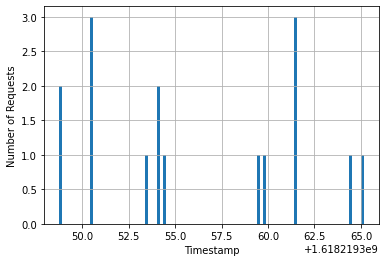

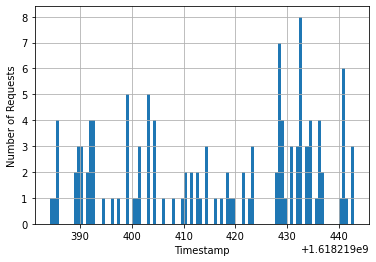

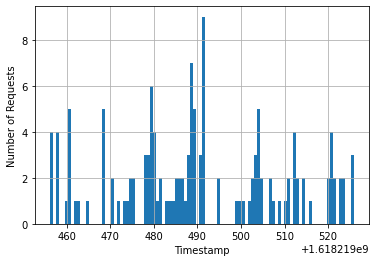

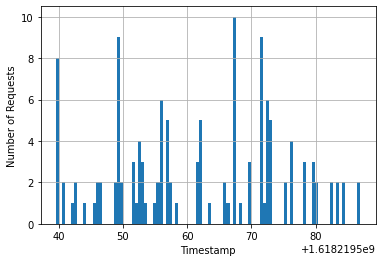

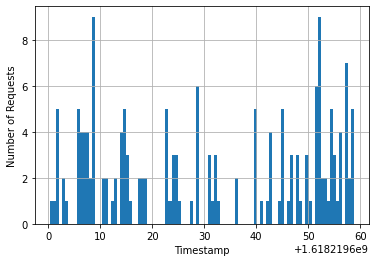

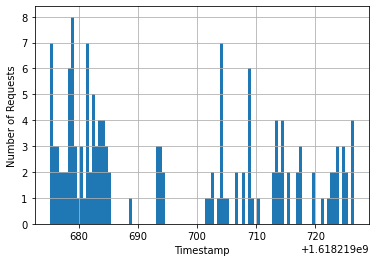

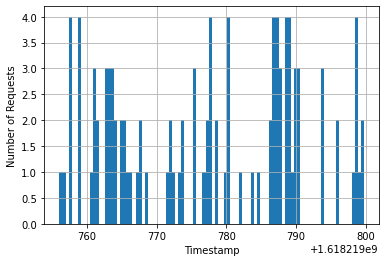

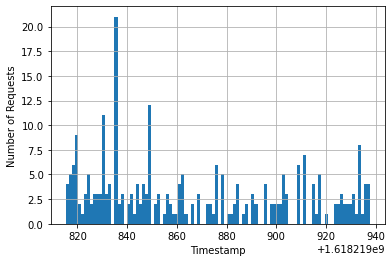

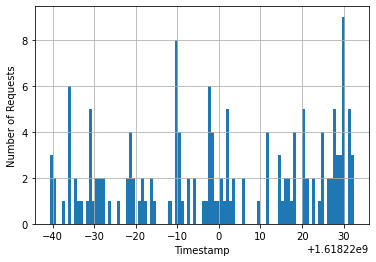

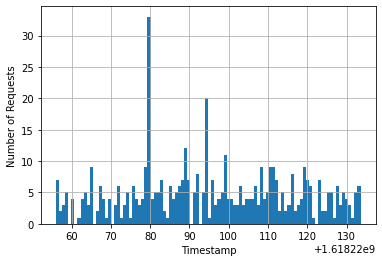

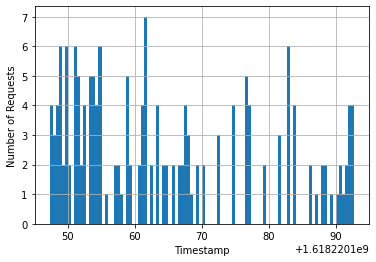

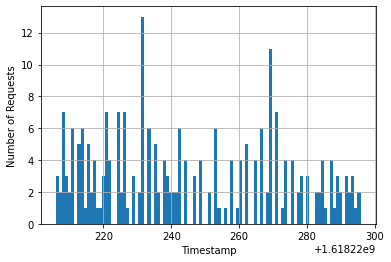

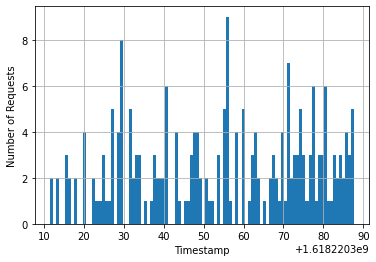

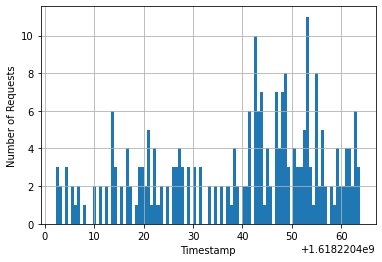

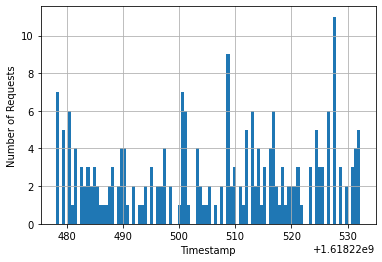

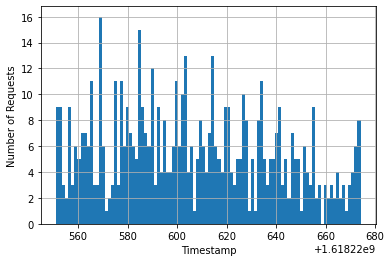

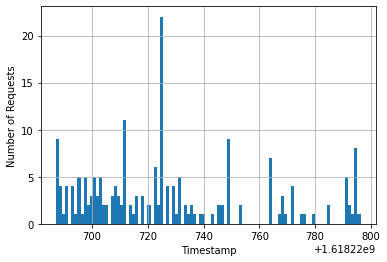

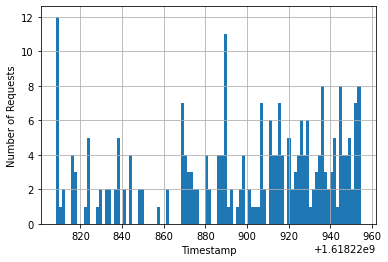

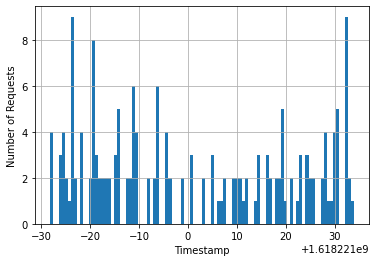

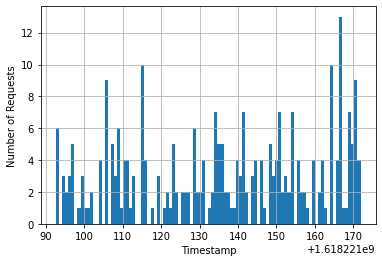

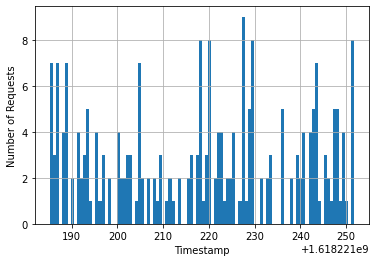

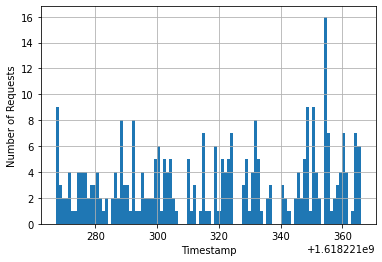

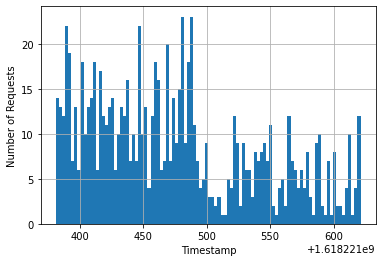

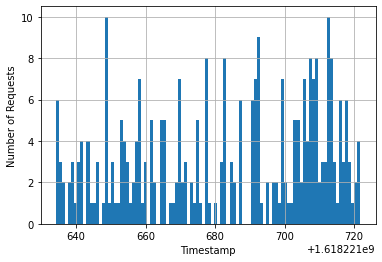

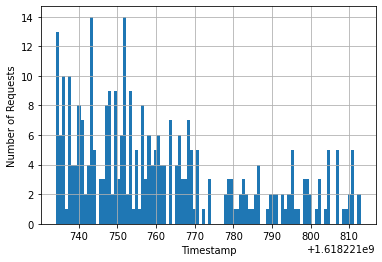

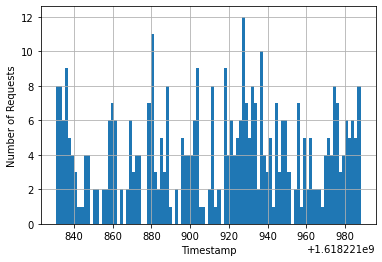

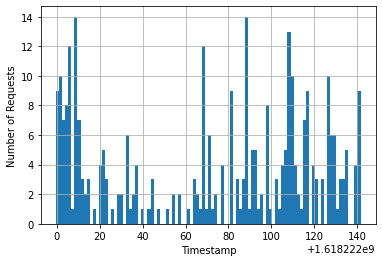

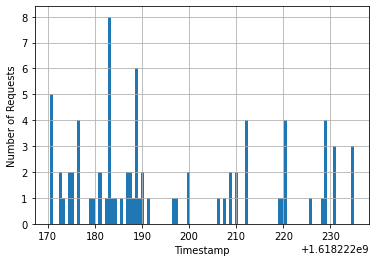

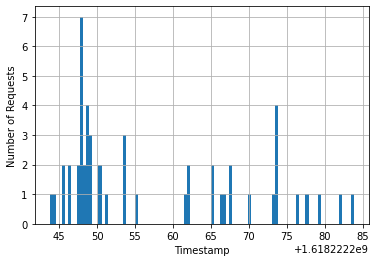

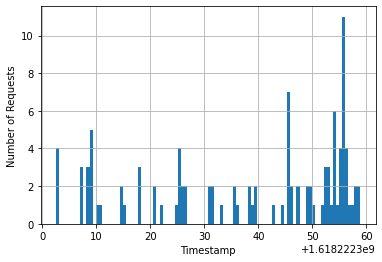

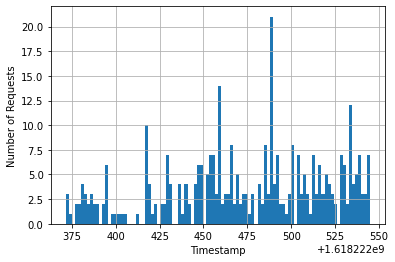

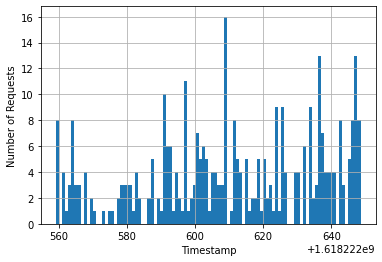

In [12]:
for start, stop, number in zip(starts, stops, gt_numbers):
    conn = data[(data["epoch_ts"] > float(start)) & (data["epoch_ts"] < float(stop))]
    plt.figure()
    conn["epoch_ts"].hist(bins=100)
    plt.xlabel("Timestamp")
    plt.ylabel("Number of Requests")